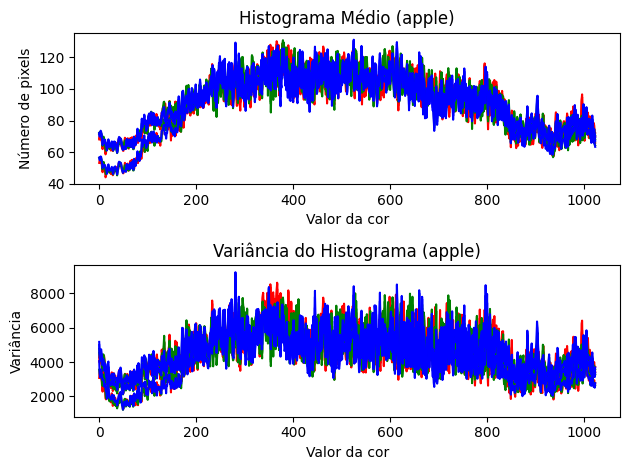

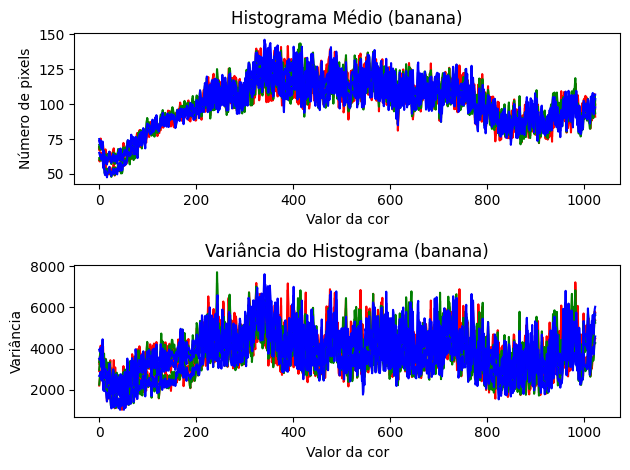

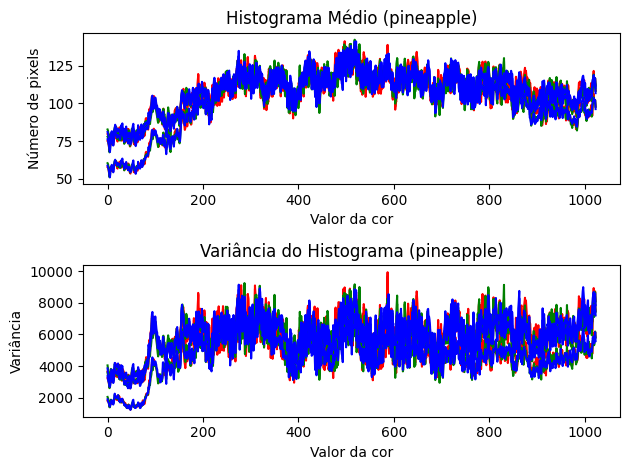

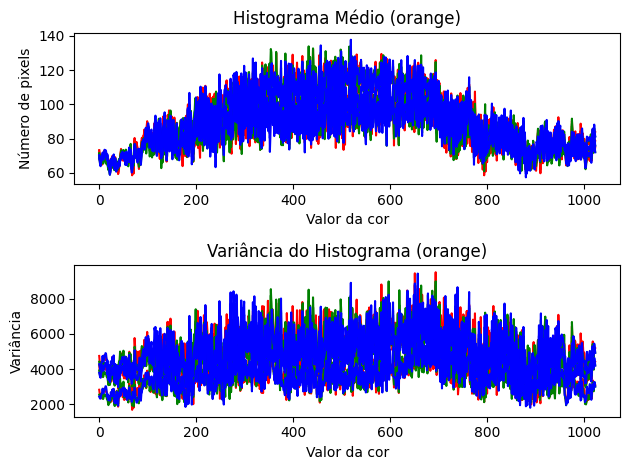

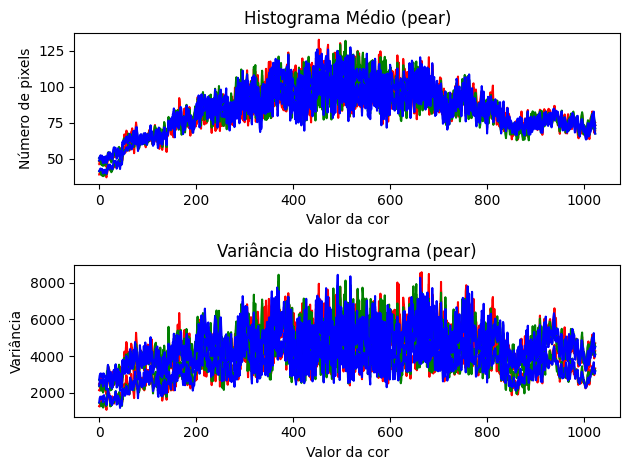

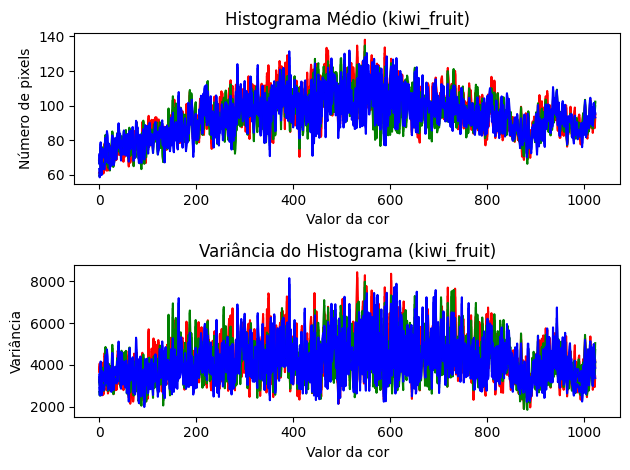

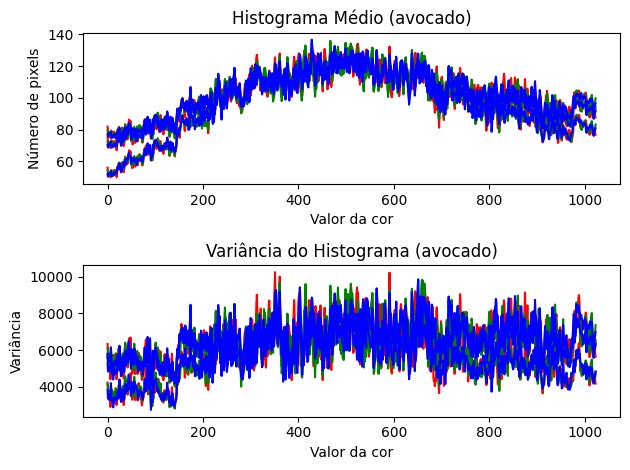

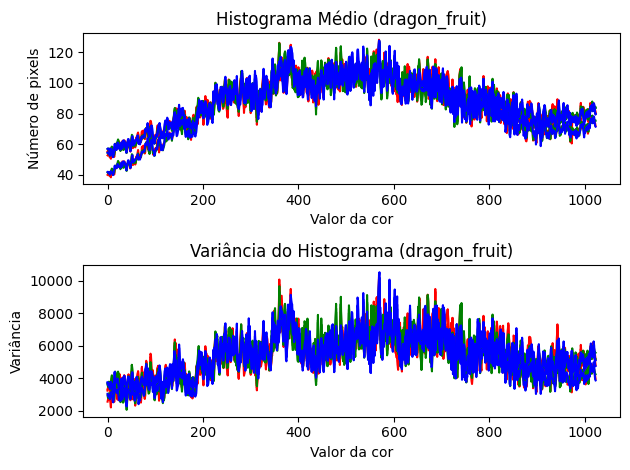

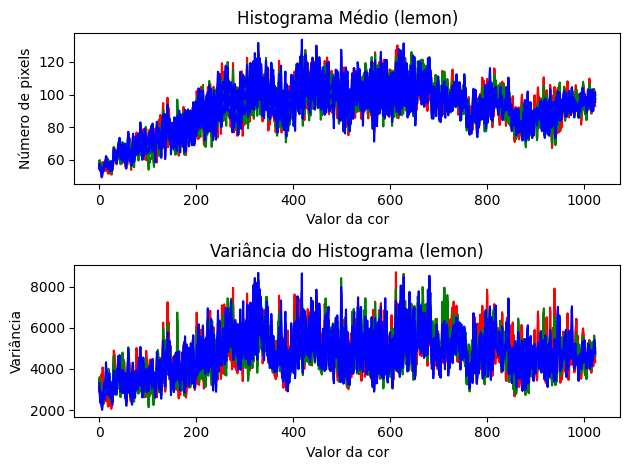

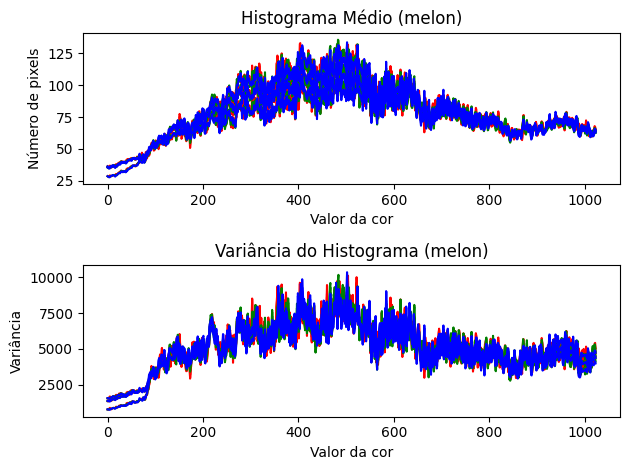

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def read_image(filename):
    return cv2.imread(filename)

def histogram_image(image, fruit, filename):
    # Gera e plota o histograma
    colors = ("red", "green", "blue")
    plt.figure()
    plt.xlim([0, 256])
    for channel_id, color in enumerate(colors):
        histogram, bin_edges = np.histogram(
            image[:, :, channel_id], bins=256, range=(0, 256)
        )
        plt.plot(bin_edges[0:-1], histogram, color=color)

    plt.title("Histograma ({}, {})".format(fruit, filename))
    plt.xlabel("Valor da cor")
    plt.ylabel("Número de pixels")

def process_image(image):
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_blur = cv2.GaussianBlur(image_gray, (5, 5), 0)
    image_threshold = cv2.threshold(image_blur, 127, 255, cv2.THRESH_BINARY)[1]
    return image_threshold

fruits = [('apple', '01'), ('banana', '02'), ('pineapple', '03'), ('orange', '04'), ('pear', '05'), ('kiwi_fruit', '06'), ('avocado', '07'), ('dragon_fruit', '08'), ('lemon', '09'), ('melon', '10')]
versions = ['V1', 'V2']
colors = ['B', 'W']
operations = ['', 'cnv', 'pot', 'mirror']
folder_original_images = 'FrutasProcessadas'

def process_images_in_folder(folder_path, fruit, class_histograms):
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            filename = os.path.join(root, file)
            image = read_image(filename)
            class_histograms.append(image)

    return class_histograms

# Calcular histograma e variância de cada classe
for fruit in fruits:
    class_histograms = []
    fruit_folder = os.path.join(folder_original_images, fruit[0].capitalize())
    class_histograms = process_images_in_folder(fruit_folder, fruit[0], class_histograms)
    class_histograms = np.array(class_histograms)

    # Calcular histograma médio e variância da classe
    average_histogram = np.mean(class_histograms, axis=0)
    histogram_variance = np.var(class_histograms, axis=0)

    # Plotar histograma médio e variância da classe
    plt.figure()
    colors = ("red", "green", "blue")
    plt.subplot(2, 1, 1)
    plt.title("Histograma Médio ({})".format(fruit[0]))
    for channel_id, color in enumerate(colors):
        plt.plot(average_histogram[:, channel_id], color=color)
    plt.xlabel("Valor da cor")
    plt.ylabel("Número de pixels")

    plt.subplot(2, 1, 2)
    plt.title("Variância do Histograma ({})".format(fruit[0]))
    for channel_id, color in enumerate(colors):
        plt.plot(histogram_variance[:, channel_id], color=color)
    plt.xlabel("Valor da cor")
    plt.ylabel("Variância")

    plt.tight_layout()  # Ajustar espaçamento entre subplots
    plt.show()
